Veri Seti:
      isim  puan       ders
0      Ali    85  Matematik
1     Ayşe    92      Fizik
2    Fatma    78      Kimya
3   Mehmet    88  Matematik
4    Ahmet    90      Fizik
5   Zeynep    67      Kimya
6  Hüseyin    74  Matematik
7     Elif    95      Fizik
8    Murat    63      Kimya
9    Selin    70  Matematik

Ders Bazında Ortalama Puanlar:
ders
Fizik        92.333333
Kimya        69.333333
Matematik    79.250000
Name: puan, dtype: float64

Genel Performans İstatistikleri:
count    10.000000
mean     80.200000
std      11.331372
min      63.000000
25%      71.000000
50%      81.500000
75%      89.500000
max      95.000000
Name: puan, dtype: float64


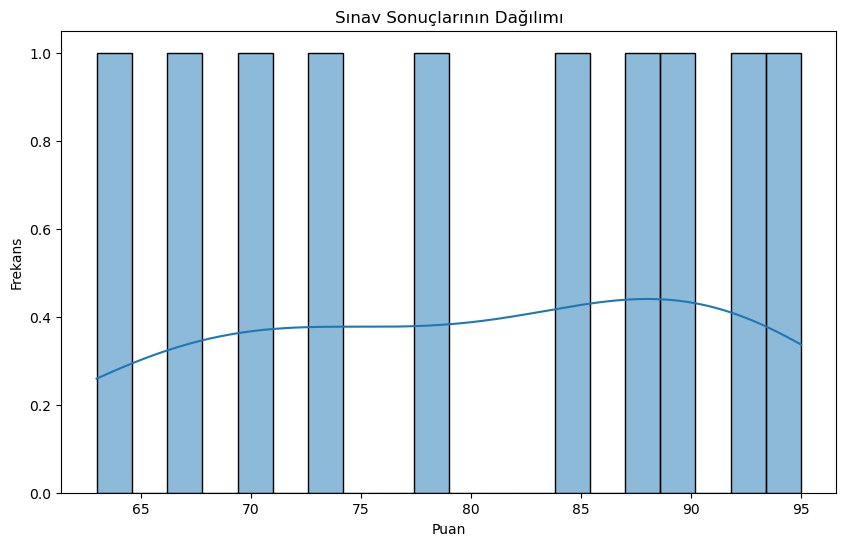


Ders Bazında Düşük Performans Gösteren Öğrenciler:
Series([], Name: isim, dtype: int64)

Ders Bazında Yüksek Performans Gösteren Öğrenciler:
ders
Fizik        3
Matematik    2
Name: isim, dtype: int64

Eğitim Stratejileri İçin Öneriler:
Matematik dersinde ortalama puan: 79.25
Matematik dersinde ortalama yüksek. Mevcut strateji devam edebilir.
Fizik dersinde ortalama puan: 92.33
Fizik dersinde ortalama yüksek. Mevcut strateji devam edebilir.
Kimya dersinde ortalama puan: 69.33
Kimya dersinde ortalama iyi, ancak daha fazla uygulamalı çalışma faydalı olabilir.


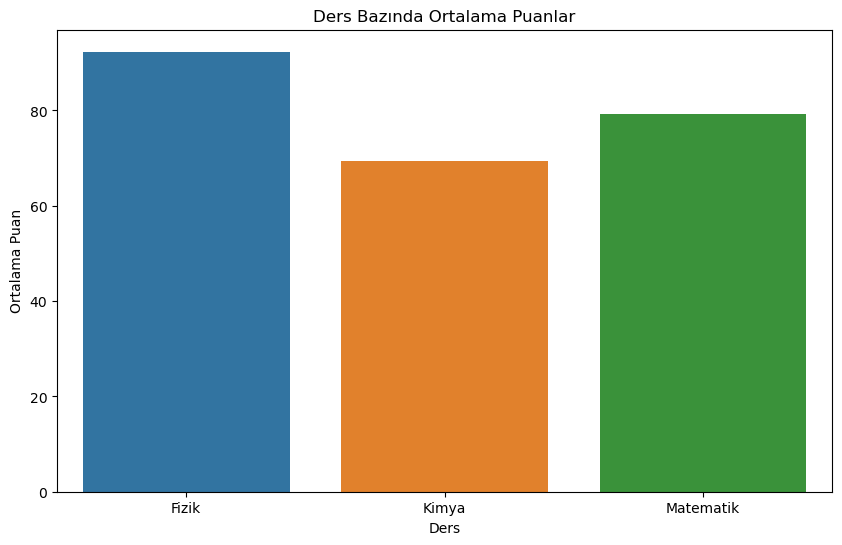


Düşük performans gösteren öğrenci yok.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Örnek verileri bir sözlük şeklinde oluşturun
data = {
    'isim': ['Ali', 'Ayşe', 'Fatma', 'Mehmet', 'Ahmet', 'Zeynep', 'Hüseyin', 'Elif', 'Murat', 'Selin'],
    'puan': [85, 92, 78, 88, 90, 67, 74, 95, 63, 70],
    'ders': ['Matematik', 'Fizik', 'Kimya', 'Matematik', 'Fizik', 'Kimya', 'Matematik', 'Fizik', 'Kimya', 'Matematik']
}

# Verileri bir DataFrame'e dönüştürün
df = pd.DataFrame(data)

# DataFrame'i bir CSV dosyasına kaydedin
csv_file = 'sinav_sonuclari.csv'
df.to_csv(csv_file, index=False)

# CSV dosyasını okuyun
df = pd.read_csv(csv_file)
print("Veri Seti:")
print(df)

# Temel İstatistiksel Analizler
ortalama_puanlar = df.groupby('ders')['puan'].mean()
print("\nDers Bazında Ortalama Puanlar:")
print(ortalama_puanlar)

genel_istatistikler = df['puan'].describe()
print("\nGenel Performans İstatistikleri:")
print(genel_istatistikler)

# Sınav sonuçlarının dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['puan'], bins=20, kde=True)
plt.title('Sınav Sonuçlarının Dağılımı')
plt.xlabel('Puan')
plt.ylabel('Frekans')
plt.show()

# Performans Analizi ve Eğitim Stratejileri
alt_performans = df[df['puan'] < 50].groupby('ders')['isim'].count()
print("\nDers Bazında Düşük Performans Gösteren Öğrenciler:")
print(alt_performans)

ust_performans = df[df['puan'] >= 85].groupby('ders')['isim'].count()
print("\nDers Bazında Yüksek Performans Gösteren Öğrenciler:")
print(ust_performans)

# Eğitim stratejileri için öneriler
print("\nEğitim Stratejileri İçin Öneriler:")
for ders in df['ders'].unique():
    ders_puanlari = df[df['ders'] == ders]['puan']
    ortalama_puan = ders_puanlari.mean()
    print(f"{ders} dersinde ortalama puan: {ortalama_puan:.2f}")
    if ortalama_puan < 60:
        print(f"{ders} dersinde ortalama düşük. Ek destek önerilir.")
    elif ortalama_puan >= 60 and ortalama_puan < 75:
        print(f"{ders} dersinde ortalama iyi, ancak daha fazla uygulamalı çalışma faydalı olabilir.")
    else:
        print(f"{ders} dersinde ortalama yüksek. Mevcut strateji devam edebilir.")

# Görselleştirmeler
plt.figure(figsize=(10, 6))
sns.barplot(x=ortalama_puanlar.index, y=ortalama_puanlar.values)
plt.title('Ders Bazında Ortalama Puanlar')
plt.xlabel('Ders')
plt.ylabel('Ortalama Puan')
plt.show()

# Alt performans grafiğini sadece veri varsa göster
if not alt_performans.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=alt_performans.index, y=alt_performans.values)
    plt.title('Ders Bazında Düşük Performans Gösteren Öğrenci Sayısı')
    plt.xlabel('Ders')
    plt.ylabel('Öğrenci Sayısı')
    plt.show()
else:
    print("\nDüşük performans gösteren öğrenci yok.")